In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [41]:
df = pd.read_csv("./results/results.csv")
print(len(df))
df.head(5)

1303


,cpu_architecture,cpu_core_count,cpu_model_name,total_DRAM_(GB),storage_read_count,storage_write_count,storage_read_bytes,storage_write_bytes,storage_devices,IO Stats,...,distance_metric,query_size,peak_dram_(MB),peak_WSS_(MB),index,index_type,dtype,latency_(s),recall1,recall2
0,aarch64,4,Cortex-A57,1.925926,24100,13809,1189135360,315854848,"[{'Name': 'mtdblock0', 'Type': 'disk', 'Size':...","[{'Device': 'loop0', 'r/s': '0.01', 'rkB/s': '...",...,L2,10,85.851562,85.851562,deep10K_96D_float32.annoy,annoy,float32,0.080343,1.000,1.0
1,aarch64,4,Cortex-A57,1.925926,24100,13809,1189135360,315854848,"[{'Name': 'mtdblock0', 'Type': 'disk', 'Size':...","[{'Device': 'loop0', 'r/s': '0.01', 'rkB/s': '...",...,L2,10,86.015625,86.015625,deep10K_96D_float32.annoy,annoy,float32,0.079764,1.000,1.0
2,aarch64,4,Cortex-A57,1.925926,24100,13809,1189135360,315854848,"[{'Name': 'mtdblock0', 'Type': 'disk', 'Size':...","[{'Device': 'loop0', 'r/s': '0.01', 'rkB/s': '...",...,L2,10,86.019531,86.019531,deep10K_96D_float32.annoy,annoy,float32,0.115892,0.992,1.0
3,aarch64,4,Cortex-A57,1.925926,24100,13811,1189135360,315957248,"[{'Name': 'mtdblock0', 'Type': 'disk', 'Size':...","[{'Device': 'loop0', 'r/s': '0.01', 'rkB/s': '...",...,L2,10,86.019531,86.019531,deep10K_96D_float32.annoy,annoy,float32,0.080111,0.968,1.0
4,aarch64,4,Cortex-A57,1.925926,24100,13811,1189135360,315957248,"[{'Name': 'mtdblock0', 'Type': 'disk', 'Size':...","[{'Device': 'loop0', 'r/s': '0.01', 'rkB/s': '...",...,L2,20,86.042969,86.042969,deep10K_96D_float32.annoy,annoy,float32,0.126409,1.000,1.0


In [42]:
df['throughput'] = df['query_size'] / df['latency_(s)']
k_values = df['k'].unique()

In [43]:
df = df[df['dtype'] == 'float32']
# df = df[df['recall2'] == 0]
df[['throughput', 'recall1', 'recall2']]

,throughput,recall1,recall2
0,124.467077,1.000000,1.000000
1,125.370015,1.000000,1.000000
2,86.286927,0.992000,1.000000
3,124.827504,0.968000,1.000000
4,158.216515,1.000000,1.000000
...,...,...,...
1298,28.033968,0.982911,0.997656
1299,28.087697,0.971974,0.997656
1300,28.155762,0.998047,0.998047
1301,28.177283,0.993965,0.998047


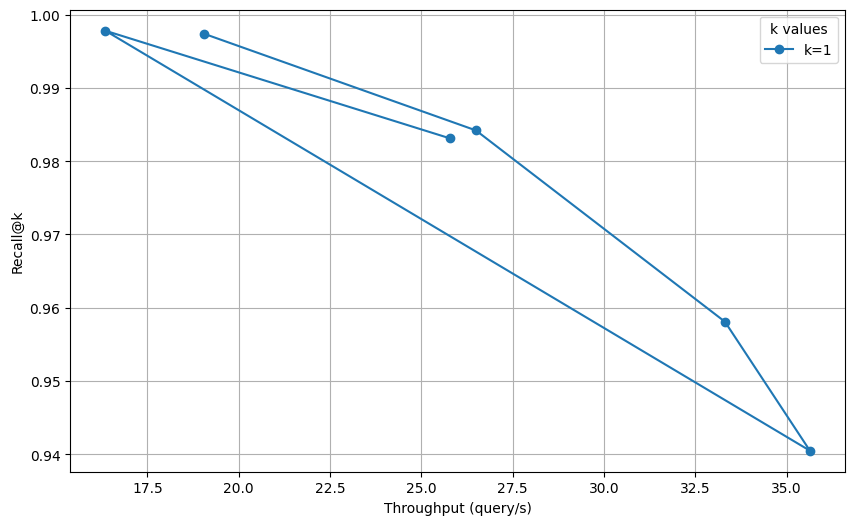

In [56]:
plt.figure(figsize=(10, 6))

for k in range(1, 2):
    subset = df[df['k'] == 100]
    subset = subset[subset['index_type'] == 'annoy']
    subset = subset[subset['query_size'] == 10000]
    plt.plot(subset['latency_(s)'], subset['recall2'], marker='o', label=f'k={k}')

plt.xlabel('Throughput (query/s)')
plt.ylabel('Recall@k')
# plt.title('Overall Throughput vs Recall@k')
plt.grid(True)
plt.legend(title='k values')
plt.show()

/tmp/ipykernel_7589/653278905.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = annoy[df['k'] == k]
/tmp/ipykernel_7589/653278905.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = annoy[df['k'] == k]
/tmp/ipykernel_7589/653278905.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = annoy[df['k'] == k]
/tmp/ipykernel_7589/653278905.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = annoy[df['k'] == k]


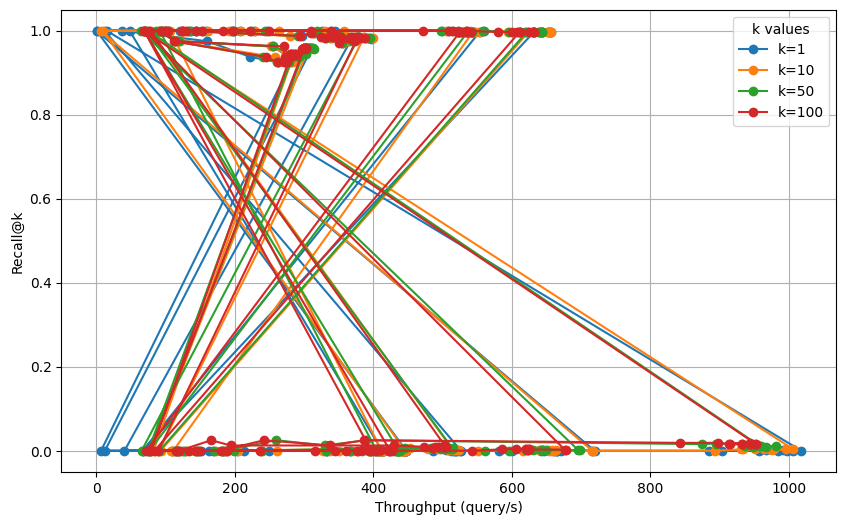

In [21]:
0plt.figure(figsize=(10, 6))

for k in k_values:
    annoy = df[df['index_type'] == 'annoy']
    subset = annoy[df['k'] == k]
    plt.plot(subset['throughput'], subset['recall2'], marker='o', label=f'k={k}')

plt.xlabel('Throughput (query/s)')
plt.ylabel('Recall@k')
# plt.title('ANNOY Throughput vs Recall@k')
plt.grid(True)
plt.legend(title='k values')
plt.show()

/tmp/ipykernel_7589/3527504793.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = spann[df['k'] == k]
/tmp/ipykernel_7589/3527504793.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = spann[df['k'] == k]
/tmp/ipykernel_7589/3527504793.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = spann[df['k'] == k]
/tmp/ipykernel_7589/3527504793.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = spann[df['k'] == k]


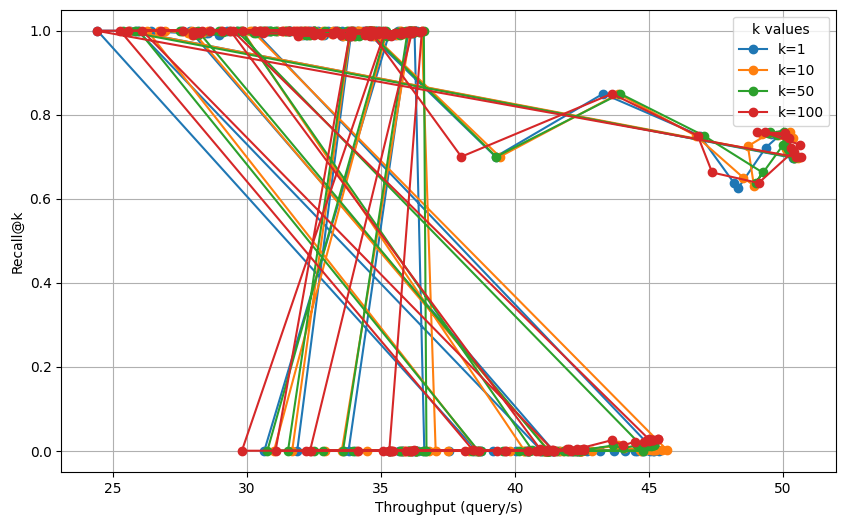

In [22]:
plt.figure(figsize=(10, 6))

for k in k_values:
    spann = df[df['index_type'] == 'spann']
    subset = spann[df['k'] == k]
    plt.plot(subset['throughput'], subset['recall2'], marker='o', label=f'k={k}')

plt.xlabel('Throughput (query/s)')
plt.ylabel('Recall@k')
# plt.title('SPANN Throughput vs Recall@k')
plt.grid(True)
plt.legend(title='k values')
plt.show()

In [23]:
recalls = pd.DataFrame()
for k in k_values:
    subset = df[df['k'] == k]
    recalls[k] = subset['recall2'].mean()
recalls

,1,10,50,100


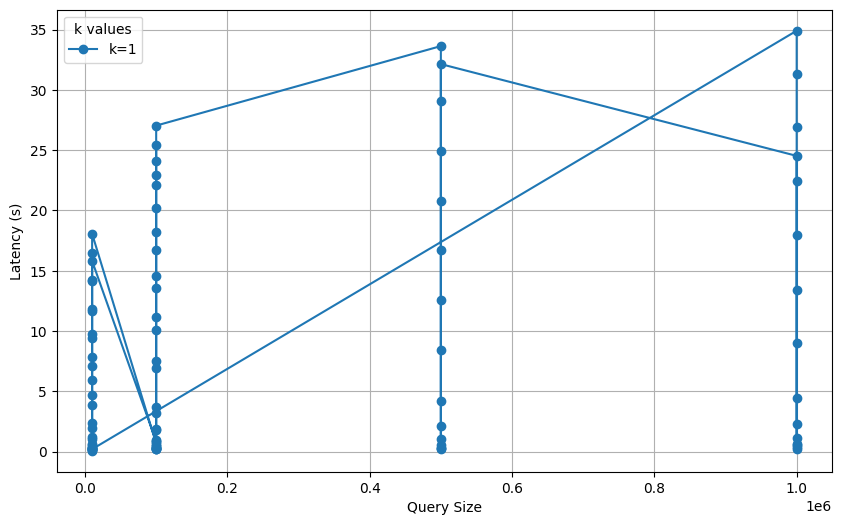

In [63]:
plt.figure(figsize=(10, 6))

for k in range(1, 2):
    spann = df[df['index_type'] == 'annoy']
    subset = spann[spann['k'] == k]
    plt.plot(subset['index_size'], subset['latency_(s)'], marker='o', label=f'k={k}')

plt.xlabel('Query Size')
plt.ylabel('Latency (s)')
# plt.title('Query Size vs Latency(s)')
plt.grid(True)
plt.legend(title='k values')
plt.show()